In [12]:
##############################################
## Data Description ##########################

In [13]:
import numpy as np
import pandas as pd
train_df = pd.read_csv(".//Data//train.csv")
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [15]:
test_df = pd.read_csv(".//Data//test.csv")
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [17]:
sample_submission = pd.read_csv(".//Data//sample_submission.csv")
sample_submission.head()

,textID,selected_text
0,f87dea47db,NaN
1,96d74cb729,NaN
2,eee518ae67,NaN
3,01082688c6,NaN
4,33987a8ee5,NaN


In [18]:
train_df.shape

(27481, 4)

In [19]:
train_df.text

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27481, dtype: object

<AxesSubplot:xlabel='sentiment', ylabel='count'>

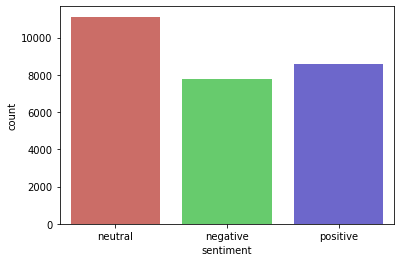

In [20]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='sentiment', data = train_df, palette = 'hls')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

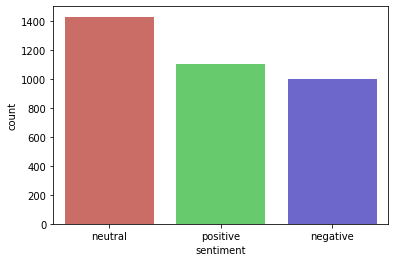

In [21]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='sentiment', data = test_df, palette = 'hls')

In [22]:
##################################################
## Data Preprocessing ###########################

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

stemmer=PorterStemmer()
stop_words=set(stopwords.words("english"))
def tweet_preprocessing(tweets):
   list_tweets_words=[]
   for tweet in tweets:
    list_tweet_words=[]
    tweet=tweet.lower()
    ##Remove userName
    tweet=re.sub(r"@[a-z0-9_-]*","",tweet)
    ##Remove hyperlinks
    tweet=re.sub(r"https?://.*[\s]*","",tweet)
    ## Remove numbers and characters
    tweet=re.sub(r"[^a-z ]*","",tweet)
    ## Replace multiple spaces by single space
    tweet=re.sub(r"[\s]+"," ",tweet)
    ##Word Tokenization
    tweet_words=word_tokenize(tweet)
    for word in tweet_words:
        #if(word not in stop_words):
         # word=stemmer.stem(word)
          list_tweet_words.append(word)
    ## join : from list of words to string
    list_tweets_words.append(list_tweet_words)
   return list_tweets_words

tweets =['99I`d have responded, if I were going','Sooo SAD']  
test = tweet_preprocessing(tweets)
test

[['id', 'have', 'responded', 'if', 'i', 'were', 'going'], ['sooo', 'sad']]

In [24]:
#Add 2 new columns to our dataframe content listes of splitted text end selected text
train_df["text_tokenize"]=tweet_preprocessing(train_df.text.astype(str))
train_df["selected_text_tokenize"]=tweet_preprocessing(train_df.selected_text.astype(str))
train_df.head()

,textID,text,selected_text,sentiment,text_tokenize,selected_text_tokenize
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, have, responded, if, i, were, going]","[id, have, responded, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]","[bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]","[leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldnt, they, put, them, on, ...","[sons, of]"


In [42]:
# we can save the new dataframe in other file csv
#train_df.to_csv("preprocessed_train_data.csv")

In [26]:
#preprocessed_df = pd.read_csv("preprocessed_train_data.csv",keep_default_na=False)
#del preprocessed_df['Unnamed: 0']
preprocessed_df = train_df
preprocessed_df.head(6)

,textID,text,selected_text,sentiment,text_tokenize,selected_text_tokenize
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, have, responded, if, i, were, going]","[id, have, responded, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]","[bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]","[leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldnt, they, put, them, on, ...","[sons, of]"
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,[],[]


In [30]:
import ast
# if we want first index we choose True, and False for the latest index
# we should use the next 2 lines one time (transform text to list)
#preprocessed_df["text_tokenize"] = preprocessed_df.text_tokenize.apply(lambda x: ast.literal_eval(x))
#preprocessed_df["selected_text_tokenize"] = preprocessed_df.selected_text_tokenize.apply(lambda x: ast.literal_eval(x))
#preprocessed_df.head()

def find_index (text_list,selectedText_list,i=True):  
    #find first word in selected_text
    try :
        if i == True :
            first_w = selectedText_list[0]
            #print(first_w)
            return (int(text_list.index(first_w))) 
            #find last word in selected_text
        else:
            last_w = selectedText_list[-1]
            # look for first_w index in text list
            return (int(text_list.index(last_w)))
    except :
        pass
a = preprocessed_df.text_tokenize.loc[2]
b = preprocessed_df.selected_text_tokenize.loc[2]  
s = find_index (a,b,i=True)
s

preprocessed_df["first_index"] = preprocessed_df.apply(lambda row : find_index(row.text_tokenize,row.selected_text_tokenize,True),axis=1)
preprocessed_df["last_index"] = preprocessed_df.apply(lambda row : find_index(row.text_tokenize,row.selected_text_tokenize,False),axis=1)
#to convert float to int pandas
pd.options.display.float_format = '{:,.0f}'.format
preprocessed_df

,textID,text,selected_text,sentiment,text_tokenize,selected_text_tokenize,first_index,last_index
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, have, responded, if, i, were, going]","[id, have, responded, if, i, were, going]",0,6
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad]",0,1
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]","[bullying, me]",3,4
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]","[leave, me, alone]",2,4
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldnt, they, put, them, on, ...","[sons, of]",0,1
...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,"[wish, we, could, come, see, u, on, denver, hu...","[d, lost]",nan,9
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,"[ive, wondered, about, rake, to, the, client, ...","[dont, force]",13,14
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,"[yay, good, for, both, of, you, enjoy, the, br...","[yay, good, for, both, of, you]",0,5
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,"[but, it, was, worth, it]","[but, it, was, worth, it]",0,1


In [31]:
# check for null values
preprocessed_df['first_index'].isnull().values.any()

True

In [32]:
# check for null values
preprocessed_df['last_index'].isnull().values.any()

True

In [34]:
##############################
######## tokenization

In [33]:
df = preprocessed_df

In [36]:
import nltk
import pandas as pd 
import ast
import tensorflow
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import pickle
df

,textID,text,selected_text,sentiment,text_tokenize,selected_text_tokenize,first_index,last_index
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, have, responded, if, i, were, going]","[id, have, responded, if, i, were, going]",0,6
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad]",0,1
2,088c60f138,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]","[bullying, me]",3,4
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]","[leave, me, alone]",2,4
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldnt, they, put, them, on, ...","[sons, of]",0,1
...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,"[wish, we, could, come, see, u, on, denver, hu...","[d, lost]",nan,9
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,"[ive, wondered, about, rake, to, the, client, ...","[dont, force]",13,14
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,"[yay, good, for, both, of, you, enjoy, the, br...","[yay, good, for, both, of, you]",0,5
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,"[but, it, was, worth, it]","[but, it, was, worth, it]",0,1


In [37]:
## tokenize and make the index of words
tokenizer = Tokenizer(num_words=20000,oov_token="<OOV>")
tokenizer.fit_on_texts(df.text_tokenize)
tokenized_text = tokenizer.texts_to_sequences(df.text_tokenize)
tokenized_selected_text = tokenizer.texts_to_sequences(df.selected_text_tokenize)
len(tokenizer.word_index)

26477

In [38]:
# index of word but
tokenizer.word_index["but"]

19

In [39]:
#after tokenzation we can prepare input of the module  
pad_token_text = pad_sequences(tokenized_text,padding = "post")
pad_token_text

array([[ 291,   16, 9941, ...,    0,    0,    0],
       [ 410,  116,    1, ...,    0,    0,    0],
       [   5, 1266,    9, ...,    0,    0,    0],
       ...,
       [ 220,   29,   11, ...,    0,    0,    0],
       [  19,    8,   27, ...,    0,    0,    0],
       [  28,   31, 6007, ...,    0,    0,    0]])

In [47]:
pd.DataFrame(pad_token_text).to_csv("pad_token_text.csv",header=None,index=None)
df.to_csv("tokenized.csv",index=None)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
###########################################
## and finally -----> the model

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.python.keras.regularizers import l2, l1, l1_l2
from tensorflow.python.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

In [45]:
targets = df[["first_index","last_index"]]
targets.head()


,first_index,last_index
0,0,6
1,0,1
2,3,4
3,2,4
4,0,1


In [48]:
training = pd.read_csv("pad_token_text.csv",header= None)
training.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,291,16,9941,68,1,119,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,410,116,1,59,90,7,87,10,1425,2162,...,0,0,0,0,0,0,0,0,0,0
2,5,1266,9,9942,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57,1099,342,15,490,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2679,12,109,388,86,314,128,14,3,6750,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# after preparing input and output we can split data for testing
x_train, x_test, y_train, y_test = train_test_split(training.values, targets.values, test_size=0.2, random_state=42)

In [50]:
def first_model(vocab_size):
    model = Sequential([
        Embedding(vocab_size, 128, input_length=33),
        Bidirectional(GRU(128, return_sequences=True, dropout=0.8, recurrent_dropout=0.8)),
        Bidirectional(GRU(128,return_sequences=True, dropout=0.8, recurrent_dropout=0.8)),
        BatchNormalization(),
        Dense(64, activation='elu',kernel_regularizer=l1_l2()),
        Dropout(0.8),
        Dense(2, activation='elu'),
        Flatten(),
        Dense(2, activation='elu')

    ])
    return model

In [51]:
x_train.shape

(21984, 33)

In [52]:
y_train.shape

(21984, 2)

In [53]:
vocab = 22000
model = first_model(vocab)
es = EarlyStopping(patience=5)
#tweet_sentiment.hdf5
mcp_save = ModelCheckpoint('model.hdf5', save_best_only=True, monitor='val_mse')
model.compile(loss="mse",optimizer="adam",metrics=['mse',"mae"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 128)           2816000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 33, 256)           197376    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 33, 256)           295680    
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 256)           1024      
_________________________________________________________________
dense_1 (Dense)              (None, 33, 64)            16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 64)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 33, 2)             130       
__________

In [54]:
# epochs 100   
history = model.fit(x=x_train, y=y_train, batch_size = 32, epochs=100, validation_split = 0.2,callbacks=[es,mcp_save])
model.save('model.hdf5')

Train on 17587 samples, validate on 4397 samples
Epoch 1/100
  640/17587 [>.............................] - ETA: 4:47 - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

KeyboardInterrupt: 